In [1]:
from census import Census
from us import states
import pandas as pd

API_KEY = ''  # Add your API key here
c = Census(API_KEY)

# Expanded list of variables to include more races
variables = {
    'B08301_010E': 'Transit_Commute',
    'B02001_001E': 'Total_Pop',
    'B02001_002E': 'White',
    'B02001_003E': 'Black',
    'B02001_004E': 'American_Indian_Alaska_Native',
    'B02001_005E': 'Asian',
    'B02001_006E': 'Native_Hawaiian_Pacific_Islander',
    'B02001_007E': 'Other_Race',
    'B02001_008E': 'Two_Or_More_Races',
    'B19001_002E': 'Low_Income',
    'B19001_017E': 'High_Income'
}

# Pull data for NY State at census tract level
data = c.acs5.state_county_tract(
    list(variables.keys()),
    states.NY.fips,
    Census.ALL,
    Census.ALL
)

# Convert to DataFrame and rename columns
df = pd.DataFrame(data)
df.rename(columns=variables, inplace=True)

# Now df includes transit commute, income, and all major race categories


###LOAD IN CENSUS TABLE WITH RELEVANT COLUMNS###

LOAD IN NPYD COMPLAINT DATA

In [2]:
# Load the NYPD complaints data
nypd_df = pd.read_csv('NYPD_complaints.csv')

# Display the first few rows
print(nypd_df.head())

/var/folders/xf/f9v_7t7d1md7jdpcj8gl5_6w0000gn/T/ipykernel_92292/3756220702.py:2: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_df = pd.read_csv('NYPD_complaints.csv')


  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  ADDR_PCT_CD  \
0   39468181   02/20/2008     07:00:00   02/23/2008     08:00:00         88.0   
1   50539499   08/21/2008     22:00:00   08/21/2008     23:00:00         19.0   
2   45223390   04/03/2008     03:35:00   04/03/2008     03:50:00         77.0   
3   50594658   08/19/2008     09:00:00          NaN       (null)         32.0   
4   44451016   03/10/2008     22:00:00   03/10/2008     22:10:00         67.0   

       RPT_DT  KY_CD       OFNS_DESC  PD_CD  ... SUSP_SEX TRANSIT_DISTRICT  \
0  02/23/2008    107        BURGLARY  221.0  ...   (null)              NaN   
1  08/22/2008    109   GRAND LARCENY  438.0  ...   (null)              NaN   
2  04/03/2008    106  FELONY ASSAULT  109.0  ...   (null)              NaN   
3  08/27/2008    341   PETIT LARCENY  349.0  ...   (null)              NaN   
4  03/11/2008    105         ROBBERY  397.0  ...        M              NaN   

    Latitude  Longitude                  Lat

In [3]:
nypd_df["BORO_NM"]

0           BROOKLYN
1          MANHATTAN
2           BROOKLYN
3          MANHATTAN
4           BROOKLYN
             ...    
9491941       QUEENS
9491942       QUEENS
9491943       QUEENS
9491944       QUEENS
9491945       QUEENS
Name: BORO_NM, Length: 9491946, dtype: object

In [4]:
nypd_df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [5]:
df.columns

Index(['Transit_Commute', 'Total_Pop', 'White', 'Black',
       'American_Indian_Alaska_Native', 'Asian',
       'Native_Hawaiian_Pacific_Islander', 'Other_Race', 'Two_Or_More_Races',
       'Low_Income', 'High_Income', 'state', 'county', 'tract'],
      dtype='object')

In [13]:
df

,Transit_Commute,Total_Pop,White,Black,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Pacific_Islander,Other_Race,Two_Or_More_Races,Low_Income,High_Income,state,county,tract
0,176.0,2259.0,750.0,989.0,0.0,30.0,20.0,280.0,190.0,67.0,7.0,36,001,000100
1,201.0,2465.0,388.0,1777.0,0.0,102.0,0.0,23.0,175.0,186.0,79.0,36,001,000201
2,256.0,2374.0,317.0,1979.0,0.0,0.0,0.0,4.0,74.0,241.0,52.0,36,001,000202
3,473.0,2837.0,1005.0,1271.0,0.0,4.0,0.0,236.0,321.0,61.0,15.0,36,001,000301
4,135.0,3200.0,2039.0,565.0,7.0,139.0,0.0,45.0,405.0,152.0,87.0,36,001,000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,2.0,2724.0,2639.0,34.0,0.0,10.0,0.0,0.0,41.0,41.0,65.0,36,123,150301
5407,0.0,1957.0,1748.0,0.0,12.0,157.0,5.0,0.0,35.0,37.0,41.0,36,123,150302
5408,0.0,3656.0,3591.0,14.0,0.0,0.0,0.0,0.0,51.0,44.0,97.0,36,123,150400
5409,0.0,2333.0,2134.0,0.0,0.0,78.0,0.0,121.0,0.0,48.0,39.0,36,123,150501


In [14]:
df[df['county']== '005']

,Transit_Commute,Total_Pop,White,Black,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Pacific_Islander,Other_Race,Two_Or_More_Races,Low_Income,High_Income,state,county,tract
101,0.0,4446.0,1898.0,2064.0,9.0,123.0,0.0,191.0,161.0,0.0,0.0,36,005,000100
102,843.0,4870.0,750.0,1473.0,0.0,299.0,0.0,1857.0,491.0,35.0,200.0,36,005,000200
103,959.0,6257.0,790.0,1897.0,0.0,192.0,0.0,2445.0,933.0,63.0,269.0,36,005,000400
104,1058.0,6177.0,551.0,2292.0,213.0,148.0,0.0,2388.0,585.0,164.0,107.0,36,005,001600
105,614.0,2181.0,466.0,1125.0,34.0,0.0,0.0,455.0,101.0,84.0,71.0,36,005,001901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,732.0,3815.0,218.0,3112.0,36.0,0.0,0.0,282.0,167.0,39.0,50.0,36,005,048401
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,005,048402
459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,005,050400
460,413.0,4292.0,3293.0,66.0,0.0,105.0,0.0,599.0,229.0,81.0,614.0,36,005,051601


In [6]:
nypd_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,221.0,...,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,438.0,...,(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,109.0,...,(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,349.0,...,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,397.0,...,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491941,290072996,07/14/2024,22:00:00,07/14/2024,22:09:00,113.0,07/14/2024,233,SEX CRIMES,681.0,...,M,NaN,40.679981,-73.776234,"(40.6799807384666, -73.7762339071953)",PATROL BORO QUEENS SOUTH,(null),<18,BLACK,F
9491942,290788624,07/28/2024,06:30:00,07/28/2024,07:30:00,113.0,07/28/2024,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.687348,-73.754472,"(40.687348, -73.754472)",PATROL BORO QUEENS SOUTH,(null),<18,ASIAN / PACIFIC ISLANDER,F
9491943,282607339,02/19/2024,20:00:00,02/21/2024,20:50:00,111.0,02/21/2024,578,HARRASSMENT 2,638.0,...,M,NaN,40.753698,-73.739251,"(40.753698, -73.739251)",PATROL BORO QUEENS NORTH,(null),25-44,ASIAN / PACIFIC ISLANDER,F
9491944,287032013,05/16/2024,18:00:00,05/16/2024,18:05:00,103.0,05/16/2024,126,MISCELLANEOUS PENAL LAW,198.0,...,F,NaN,40.703746,-73.782824,"(40.703746, -73.782824)",PATROL BORO QUEENS SOUTH,(null),25-44,ASIAN / PACIFIC ISLANDER,M


In [10]:
from IPython.display import display

# Split columns into two halves
midpoint = len(nypd_df.columns) // 2
nypd_df_left = nypd_df.iloc[:, :midpoint]
nypd_df_right = nypd_df.iloc[:, midpoint:]

# Display both halves as tables
display(nypd_df_left.head())
display(nypd_df_right.head())


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT


,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,(null),(null),(null),"991,818","191,560",(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,0,(null),(null),(null),"997,152","220,300",(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,2,(null),(null),3360,"1,004,579","183,837",(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,0,(null),(null),(null),"999,965","235,630",(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,0,(null),(null),(null),"999,602","176,145",<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M


In [36]:
#clean nypd df 

# NYC borough names to FIPS county codes (3-digit)
boro_to_fips = {
    'BRONX': '005',
    'BROOKLYN': '047',
    'MANHATTAN': '061',
    'QUEENS': '081',
    'STATEN ISLAND': '085'
}

nyc_counties = list(boro_to_fips.values())


In [17]:
#map

# Create new column for county code based on Boro_NM
nypd_df['county'] = nypd_df['BORO_NM'].map(boro_to_fips)

# Convert to string with 3 digits (in case of leading zeros)
nypd_df['county'] = nypd_df['county'].astype(str).str.zfill(3)


In [18]:
# Also make sure county in df is string with 3 digits
df['county'] = df['county'].astype(str).str.zfill(3)


In [19]:
# Aggregate crime count by county
crime_by_county = nypd_df.groupby('county').size().reset_index(name='Crime_Count')

# Merge with df on county
merged_df = df.merge(crime_by_county, on='county', how='left')
merged_df['Crime_Count'] = merged_df['Crime_Count'].fillna(0)


In [33]:


# Crime rate per 1,000 residents
merged_df['Crime_Rate_per_1000'] = (((merged_df['Crime_Count'] / merged_df['Total_Pop']))/1000)*100


In [68]:
merged_df

,Transit_Commute,Total_Pop,White,Black,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Pacific_Islander,Other_Race,Two_Or_More_Races,Low_Income,High_Income,state,county,tract,Crime_Count,Crime_Rate_per_1000
0,176.0,2259.0,750.0,989.0,0.0,30.0,20.0,280.0,190.0,67.0,7.0,36,001,000100,0.0,0.0
1,201.0,2465.0,388.0,1777.0,0.0,102.0,0.0,23.0,175.0,186.0,79.0,36,001,000201,0.0,0.0
2,256.0,2374.0,317.0,1979.0,0.0,0.0,0.0,4.0,74.0,241.0,52.0,36,001,000202,0.0,0.0
3,473.0,2837.0,1005.0,1271.0,0.0,4.0,0.0,236.0,321.0,61.0,15.0,36,001,000301,0.0,0.0
4,135.0,3200.0,2039.0,565.0,7.0,139.0,0.0,45.0,405.0,152.0,87.0,36,001,000302,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,2.0,2724.0,2639.0,34.0,0.0,10.0,0.0,0.0,41.0,41.0,65.0,36,123,150301,0.0,0.0
5407,0.0,1957.0,1748.0,0.0,12.0,157.0,5.0,0.0,35.0,37.0,41.0,36,123,150302,0.0,0.0
5408,0.0,3656.0,3591.0,14.0,0.0,0.0,0.0,0.0,51.0,44.0,97.0,36,123,150400,0.0,0.0
5409,0.0,2333.0,2134.0,0.0,0.0,78.0,0.0,121.0,0.0,48.0,39.0,36,123,150501,0.0,0.0


In [69]:
new_df = merged_df

In [37]:
# Keep only rows from the 5 NYC boroughs
nyc_df = merged_df[merged_df['county'].isin(nyc_counties)]


In [40]:
# Sum up total population and crime count by county
borough_level = nyc_df.groupby('county').agg({
    'Total_Pop': 'sum',
    'Crime_Count': 'sum',
    'Transit_Commute': 'sum'
}).reset_index()


In [39]:
nyc_df

,Transit_Commute,Total_Pop,White,Black,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Pacific_Islander,Other_Race,Two_Or_More_Races,Low_Income,High_Income,state,county,tract,Crime_Count,Crime_Rate_per_1000
101,0.0,4446.0,1898.0,2064.0,9.0,123.0,0.0,191.0,161.0,0.0,0.0,36,005,000100,2054181.0,46.202901
102,843.0,4870.0,750.0,1473.0,0.0,299.0,0.0,1857.0,491.0,35.0,200.0,36,005,000200,2054181.0,42.180308
103,959.0,6257.0,790.0,1897.0,0.0,192.0,0.0,2445.0,933.0,63.0,269.0,36,005,000400,2054181.0,32.830126
104,1058.0,6177.0,551.0,2292.0,213.0,148.0,0.0,2388.0,585.0,164.0,107.0,36,005,001600,2054181.0,33.255318
105,614.0,2181.0,466.0,1125.0,34.0,0.0,0.0,455.0,101.0,84.0,71.0,36,005,001901,2054181.0,94.185282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,772.0,6374.0,2795.0,1619.0,0.0,918.0,0.0,686.0,356.0,165.0,190.0,36,085,030302,434281.0,6.813320
4298,732.0,3674.0,858.0,1691.0,0.0,224.0,0.0,155.0,746.0,137.0,11.0,36,085,031901,434281.0,11.820386
4299,836.0,5053.0,952.0,2592.0,43.0,217.0,0.0,782.0,467.0,273.0,323.0,36,085,031902,434281.0,8.594518
4300,302.0,1133.0,261.0,430.0,0.0,21.0,0.0,119.0,302.0,20.0,91.0,36,085,032300,434281.0,38.330185


In [45]:
# Recalculate crime rate per 1,000 residents
borough_level['Crime_Rate_per_1000'] = ((borough_level['Crime_Count'] / borough_level['Total_Pop']) / 1000)*100


In [48]:
# Add Transit Commute Rate (% of total population)
borough_level['Transit_Commute_Rate'] = (borough_level['Transit_Commute'] / borough_level['Total_Pop']) * 100


In [49]:
borough_level

,county,Total_Pop,Crime_Count,Transit_Commute,Crime_Rate_per_1000,Transit_Commute_Rate
0,005,1443229.0,7.415593e+08,309995.0,51.381960,21.479266
1,047,2679620.0,2.236113e+09,620228.0,83.448881,23.146118
2,061,1645867.0,7.093147e+08,416374.0,43.096722,25.298156
3,081,2360826.0,1.398433e+09,486661.0,59.234900,20.614014
4,085,492925.0,5.471941e+07,55556.0,11.100960,11.270680


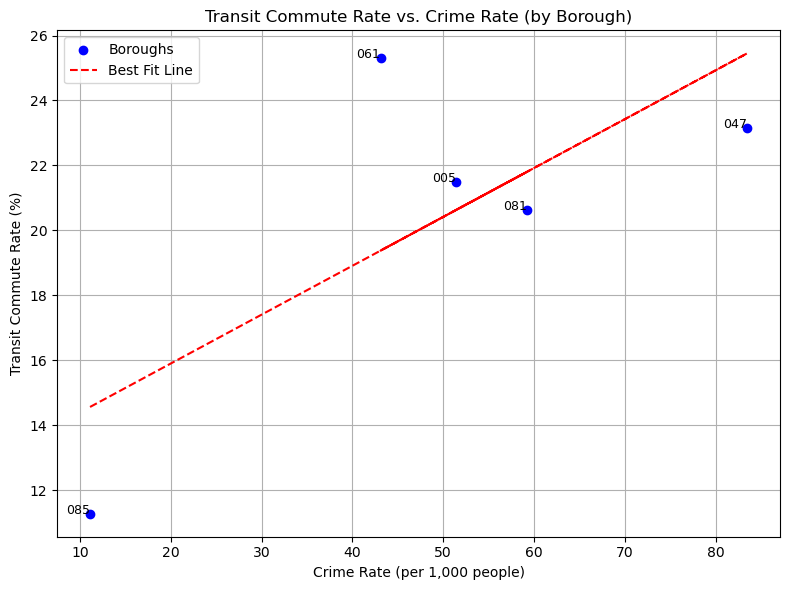

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# X: Crime rate per 1,000, Y: Transit commute rate (%)
x = borough_level['Crime_Rate_per_1000']
y = borough_level['Transit_Commute_Rate']

# Best-fit line
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Boroughs')
plt.plot(x, line, color='red', linestyle='--', label='Best Fit Line')

# Label boroughs by county code or map to names if you want
for i, row in borough_level.iterrows():
    plt.text(row['Crime_Rate_per_1000'], row['Transit_Commute_Rate'], row['county'], fontsize=9, ha='right')

plt.xlabel('Crime Rate (per 1,000 people)')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Commute Rate vs. Crime Rate (by Borough)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Plot Violent Vs Property Crime

In [52]:
# Define which offenses count as violent and property crimes
violent_keywords = ['ASSAULT', 'ROBBERY', 'RAPE', 'MURDER', 'HOMICIDE']
property_keywords = ['BURGLARY', 'LARCENY', 'THEFT', 'ARSON']

# Helper functions to classify offenses
def classify_violent(desc):
    return any(word in str(desc).upper() for word in violent_keywords)

def classify_property(desc):
    return any(word in str(desc).upper() for word in property_keywords)

# Apply classifications
nypd_df['is_violent'] = nypd_df['OFNS_DESC'].apply(classify_violent)
nypd_df['is_property'] = nypd_df['OFNS_DESC'].apply(classify_property)


In [53]:
crime_by_type = nypd_df.groupby('county').agg({
    'is_violent': 'sum',
    'is_property': 'sum'
}).reset_index().rename(columns={
    'is_violent': 'Violent_Crime_Count',
    'is_property': 'Property_Crime_Count'
})


In [54]:
# Ensure df county is 3-digit string
df['county'] = df['county'].astype(str).str.zfill(3)

# Filter df to 5 boroughs
nyc_df = df[df['county'].isin(boro_to_fips.values())].copy()

# Aggregate df to borough level
df_boroughs = nyc_df.groupby('county').agg({
    'Transit_Commute': 'sum',
    'Total_Pop': 'sum'
}).reset_index()

# Compute transit commute rate
df_boroughs['Transit_Commute_Rate'] = (df_boroughs['Transit_Commute'] / df_boroughs['Total_Pop']) * 100

# Merge with crime counts
merged = df_boroughs.merge(crime_by_type, on='county', how='left')


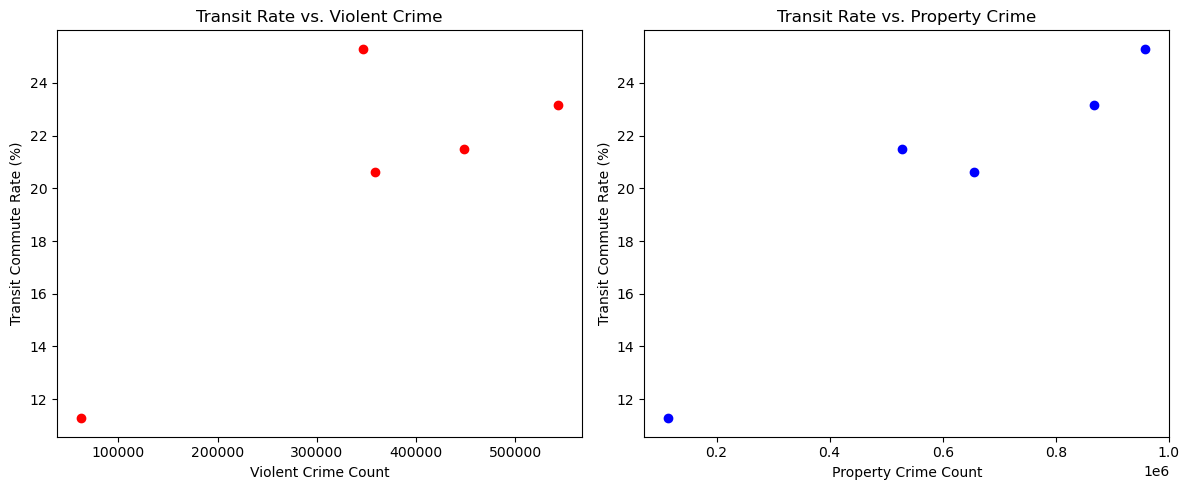

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Violent Crime
plt.subplot(1, 2, 1)
plt.scatter(merged['Violent_Crime_Count'], merged['Transit_Commute_Rate'], color='red')
plt.xlabel('Violent Crime Count')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Violent Crime')

# Property Crime
plt.subplot(1, 2, 2)
plt.scatter(merged['Property_Crime_Count'], merged['Transit_Commute_Rate'], color='blue')
plt.xlabel('Property Crime Count')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Property Crime')

plt.tight_layout()
plt.show()


In [56]:
# Add violent and property crime rates per 1,000 people
merged['Violent_Crime_Rate'] = (merged['Violent_Crime_Count'] / merged['Total_Pop']) * 1000
merged['Property_Crime_Rate'] = (merged['Property_Crime_Count'] / merged['Total_Pop']) * 1000


In [58]:
# Map FIPS county codes to borough names
fips_to_boro = {
    '005': 'BRONX',
    '047': 'BROOKLYN',
    '061': 'MANHATTAN',
    '081': 'QUEENS',
    '085': 'STATEN ISLAND'
}

# Add Borough column
merged['Borough'] = merged['county'].map(fips_to_boro)


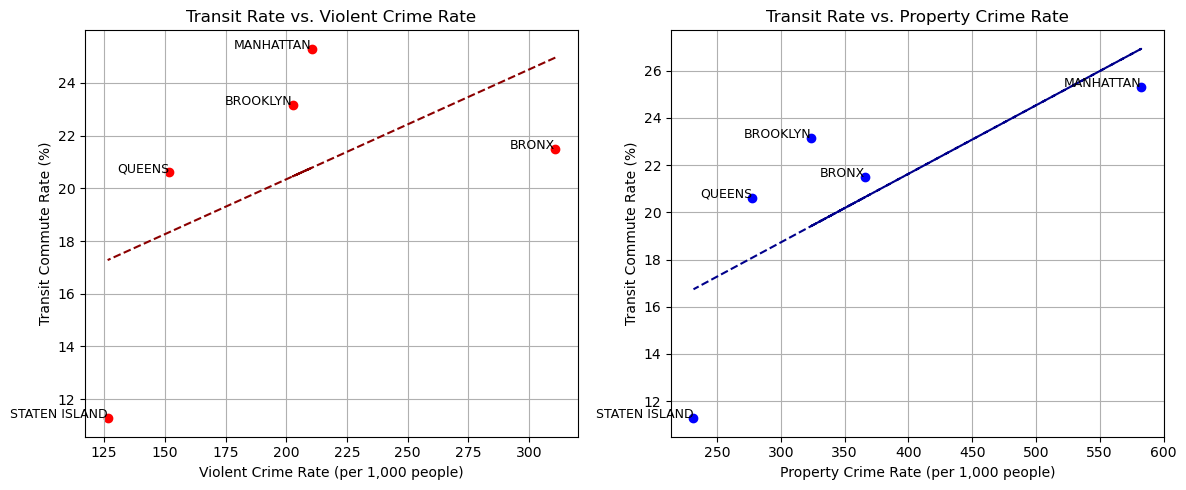

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# --- Violent Crime Rate ---
plt.subplot(1, 2, 1)
x_v = merged['Violent_Crime_Rate']
y = merged['Transit_Commute_Rate']

# Best-fit line
slope_v, intercept_v = np.polyfit(x_v, y, 1)
plt.plot(x_v, slope_v * x_v + intercept_v, color='darkred', linestyle='--', label='Best Fit')

# Scatter + labels
plt.scatter(x_v, y, color='red')
for _, row in merged.iterrows():
    plt.text(row['Violent_Crime_Rate'], row['Transit_Commute_Rate'], row['Borough'], fontsize=9, ha='right')

plt.xlabel('Violent Crime Rate (per 1,000 people)')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Violent Crime Rate')
plt.grid(True)

# --- Property Crime Rate ---
plt.subplot(1, 2, 2)
x_p = merged['Property_Crime_Rate']

# Best-fit line
slope_p, intercept_p = np.polyfit(x_p, y, 1)
plt.plot(x_p, slope_p * x_p + intercept_p, color='darkblue', linestyle='--', label='Best Fit')

# Scatter + labels
plt.scatter(x_p, y, color='blue')
for _, row in merged.iterrows():
    plt.text(row['Property_Crime_Rate'], row['Transit_Commute_Rate'], row['Borough'], fontsize=9, ha='right')

plt.xlabel('Property Crime Rate (per 1,000 people)')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Property Crime Rate')
plt.grid(True)

plt.tight_layout()
plt.show()



Finding the Night Time Crime Rate

In [61]:
# Parse time quickly with known format (HH:MM:SS)
nypd_df['CMPLNT_FR_TM'] = pd.to_datetime(
    nypd_df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce'
).dt.time


In [62]:
from datetime import time

def is_night(t):
    if pd.isna(t): return False
    return t >= time(20, 0) or t <= time(6, 0)

nypd_df['is_night'] = nypd_df['CMPLNT_FR_TM'].apply(is_night)
nypd_df['is_day'] = ~nypd_df['is_night']


Map Boroughs

In [63]:
boro_to_fips = {
    'BRONX': '005',
    'BROOKLYN': '047',
    'MANHATTAN': '061',
    'QUEENS': '081',
    'STATEN ISLAND': '085'
}
nypd_df['county'] = nypd_df['BORO_NM'].map(boro_to_fips).astype(str).str.zfill(3)


Aggregate by County


In [64]:
crime_time = nypd_df.groupby('county').agg({
    'is_night': 'sum',
    'is_day': 'sum'
}).reset_index().rename(columns={
    'is_night': 'Night_Crime_Count',
    'is_day': 'Day_Crime_Count'
})


In [65]:
# Ensure county format matches
df['county'] = df['county'].astype(str).str.zfill(3)

# Keep only the 5 boroughs
nyc_df = df[df['county'].isin(boro_to_fips.values())].copy()

# Aggregate to borough level
df_boroughs = nyc_df.groupby('county').agg({
    'Transit_Commute': 'sum',
    'Total_Pop': 'sum'
}).reset_index()

# Calculate transit commute rate
df_boroughs['Transit_Commute_Rate'] = (df_boroughs['Transit_Commute'] / df_boroughs['Total_Pop']) * 100


In [66]:
# Merge with crime data
merged_time = df_boroughs.merge(crime_time, on='county')

# Add crime rates per 1,000 people
merged_time['Night_Crime_Rate'] = (merged_time['Night_Crime_Count'] / merged_time['Total_Pop']) * 1000
merged_time['Day_Crime_Rate'] = (merged_time['Day_Crime_Count'] / merged_time['Total_Pop']) * 1000

# Add borough labels
fips_to_boro = {v: k for k, v in boro_to_fips.items()}
merged_time['Borough'] = merged_time['county'].map(fips_to_boro)


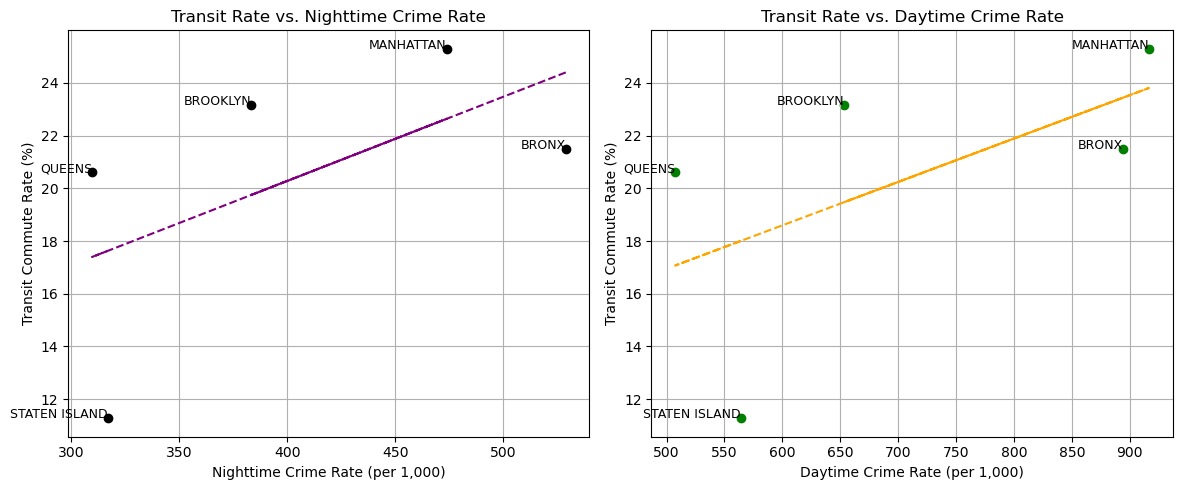

In [67]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))

# Nighttime
plt.subplot(1, 2, 1)
x_n = merged_time['Night_Crime_Rate']
y = merged_time['Transit_Commute_Rate']
slope_n, intercept_n = np.polyfit(x_n, y, 1)
plt.plot(x_n, slope_n * x_n + intercept_n, linestyle='--', color='purple')
plt.scatter(x_n, y, color='black')
for _, row in merged_time.iterrows():
    plt.text(row['Night_Crime_Rate'], row['Transit_Commute_Rate'], row['Borough'], fontsize=9, ha='right')
plt.xlabel('Nighttime Crime Rate (per 1,000)')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Nighttime Crime Rate')
plt.grid(True)

# Daytime
plt.subplot(1, 2, 2)
x_d = merged_time['Day_Crime_Rate']
slope_d, intercept_d = np.polyfit(x_d, y, 1)
plt.plot(x_d, slope_d * x_d + intercept_d, linestyle='--', color='orange')
plt.scatter(x_d, y, color='green')
for _, row in merged_time.iterrows():
    plt.text(row['Day_Crime_Rate'], row['Transit_Commute_Rate'], row['Borough'], fontsize=9, ha='right')
plt.xlabel('Daytime Crime Rate (per 1,000)')
plt.ylabel('Transit Commute Rate (%)')
plt.title('Transit Rate vs. Daytime Crime Rate')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Defining Income Groups
def get_income_group(row):
    if row['Low_Income'] > row['High_Income']:
        return 'Low'
    elif row['High_Income'] > row['Low_Income']:
        return 'High'
    else:
        return 'Medium'

merged_df['Income_Group'] = merged_df.apply(get_income_group, axis=1)


In [71]:
merged_df['Transit_Rate'] = (merged_df['Transit_Commute'] / merged_df['Total_Pop']) * 100


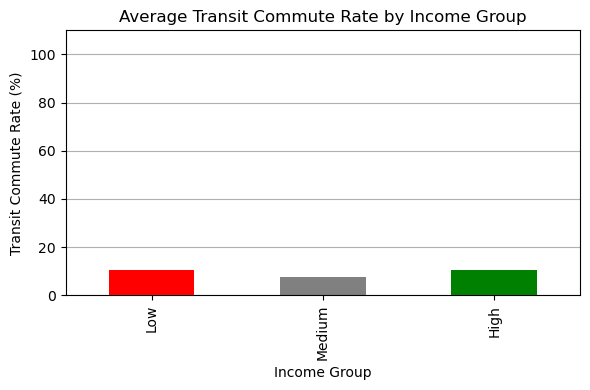

In [73]:
import matplotlib.pyplot as plt

income_group_avg = merged_df.groupby('Income_Group')['Transit_Rate'].mean().reindex(['Low', 'Medium', 'High'])

plt.figure(figsize=(6, 4))
income_group_avg.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Average Transit Commute Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Transit Commute Rate (%)')
plt.ylim(0, merged_df['Transit_Rate'].max() * 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [74]:
race_cols = ['White', 'Black', 'Asian', 'American_Indian_Alaska_Native',
             'Native_Hawaiian_Pacific_Islander', 'Other_Race', 'Two_Or_More_Races']

merged_df['Dominant_Race'] = merged_df[race_cols].idxmax(axis=1)


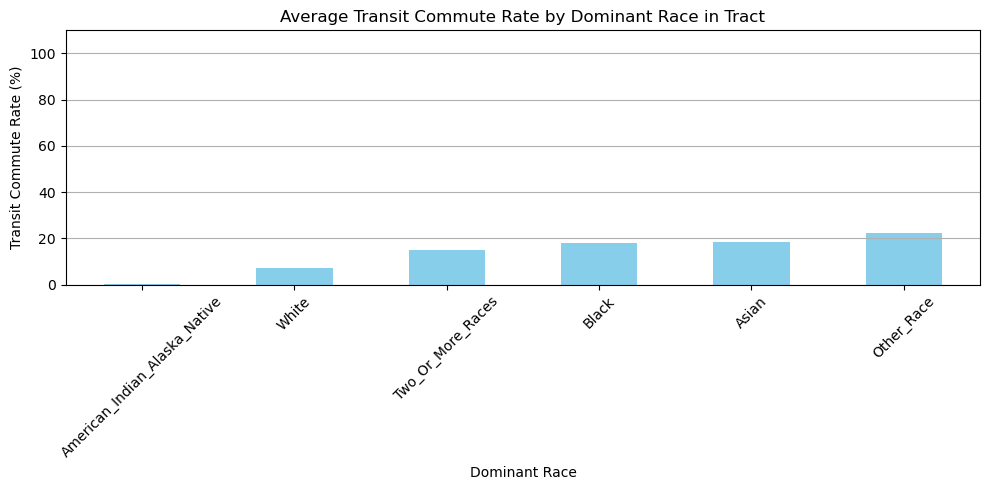

In [75]:
race_avg = merged_df.groupby('Dominant_Race')['Transit_Rate'].mean().sort_values()

plt.figure(figsize=(10, 5))
race_avg.plot(kind='bar', color='skyblue')
plt.title('Average Transit Commute Rate by Dominant Race in Tract')
plt.xlabel('Dominant Race')
plt.ylabel('Transit Commute Rate (%)')
plt.ylim(0, merged_df['Transit_Rate'].max() * 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
